In [27]:
# Import Libaries
# Import data
# EDA
# Cleaning -> Null values and Outliers and VIF
# Model building
# splitting Data
# Training Data
# Testing
# Accuracy

In [28]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [29]:
bank=pd.read_csv('bank-additional-full.csv',sep=';')

In [30]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The data is related to direct marketing campaign. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g.,Logistic Regression, SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [31]:
data=bank.copy()

In [32]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Here column = y --> is the target column i.e dependent variable

# EDA -
        Exploratory data Analysis

In [33]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [34]:
data.shape

(41199, 21)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [36]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [37]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [38]:
data.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [39]:
data.duplicated().sum()

15

In [40]:
data['y']

# we are predicting if the person will take the insurance or not
# no --> not take
# yes --> will take
# yes -->  1
# no -->  0

0         no
1         no
2         no
3         no
4         no
        ... 
41194     no
41195     no
41196     no
41197    NaN
41198     no
Name: y, Length: 41199, dtype: object

In [41]:
data['y'] = np.where(data['y']=='yes',1,0)
data['y'] = data['y'].astype(str)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

# Data Cleaning

In [43]:
data.isna().sum()

# isna() --> check the null values
# sum() --> added and given the result

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 0
dtype: int64

In [44]:
data['age'].mean()

40.03031921349678

In [45]:
data['age'].median()

38.0

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

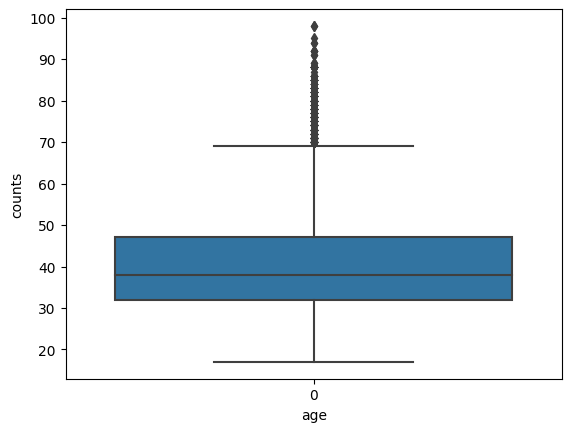

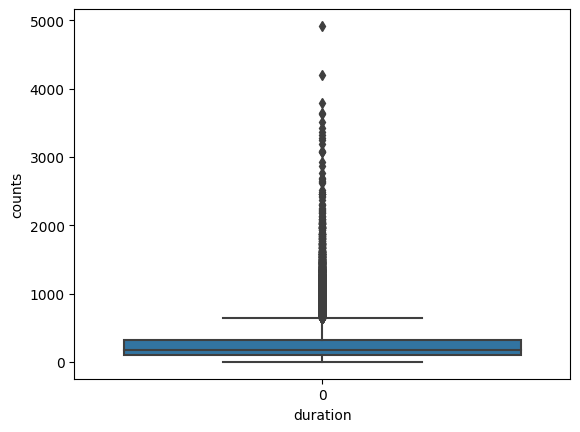

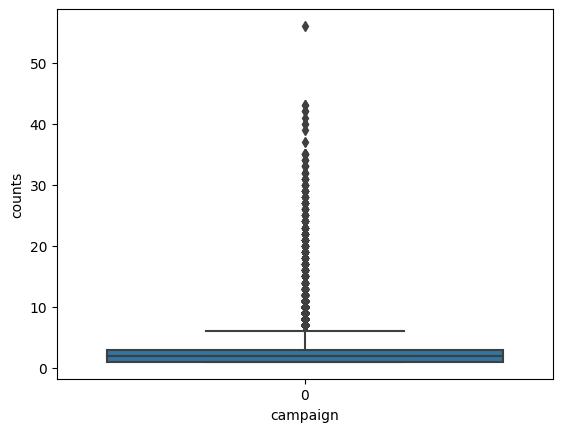

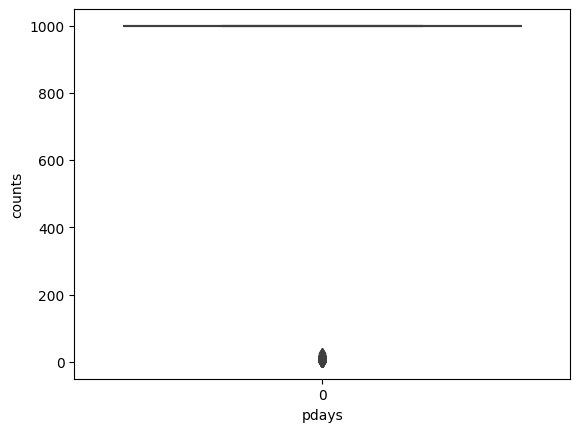

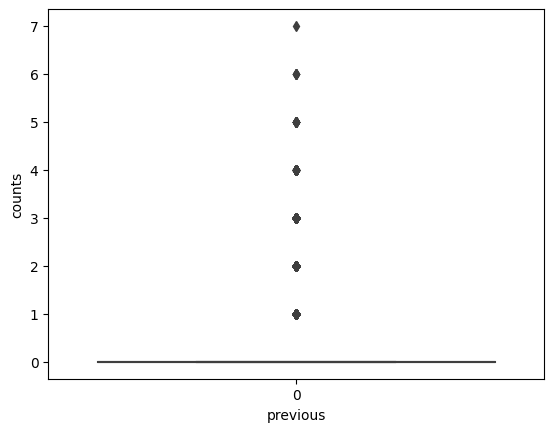

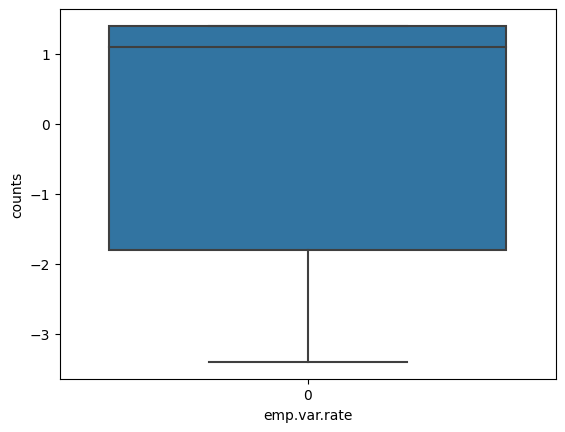

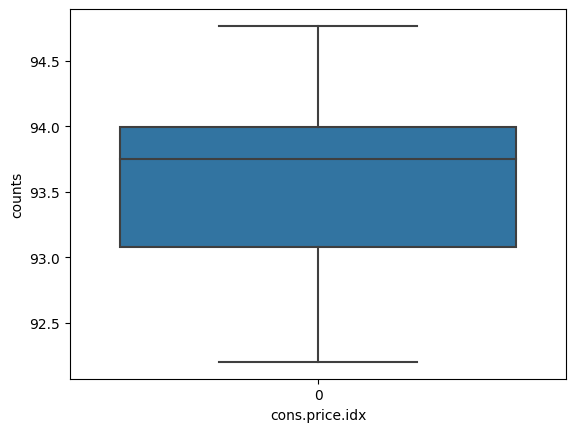

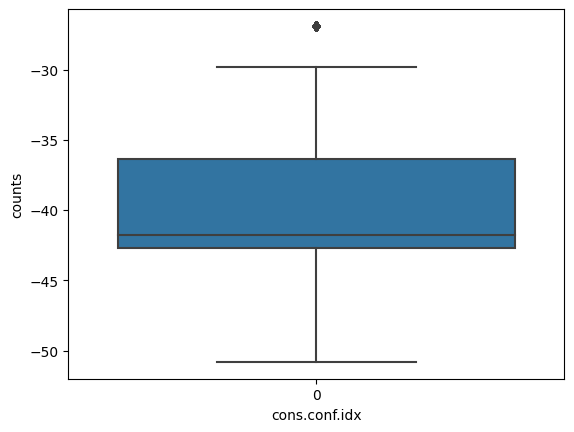

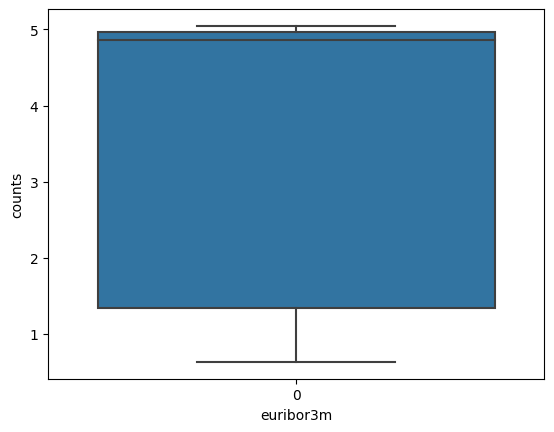

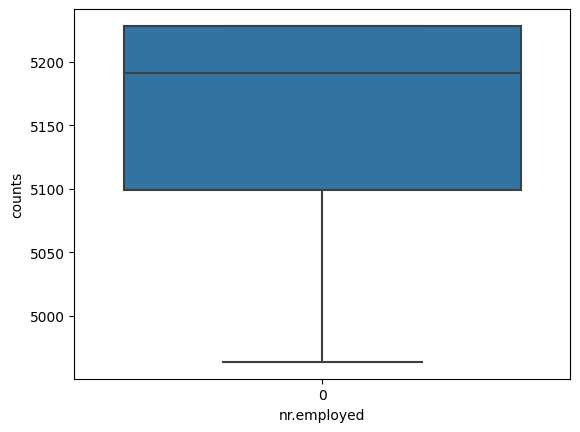

In [47]:
# outliers
#sns.boxplot(data['age'])

col = list(data.columns)
for a in col:
    if data[a].dtype == 'float64':
        sns.boxplot(data[a])
        plt.xlabel(a)
        plt.ylabel('counts')
        plt.show()
        



In [48]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [49]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [50]:
# stored the continuous variable in list 'col1'
col1=[]
for i in list(data.columns):
    if data[i].dtype == 'float64':
        col1.append(i)
        

In [51]:
for i in col1:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1
    data[i]= data[i][(data[i] > (Q1-1.5*IQR)) & (data[i] < (Q3+1.5*IQR))]
    
   


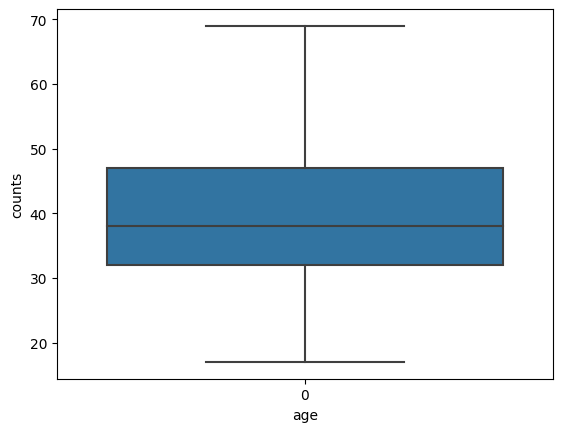

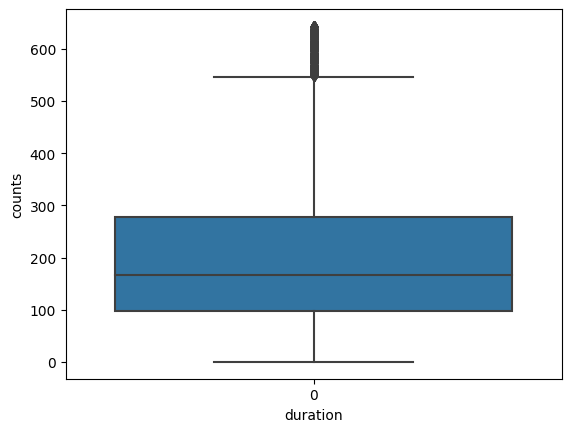

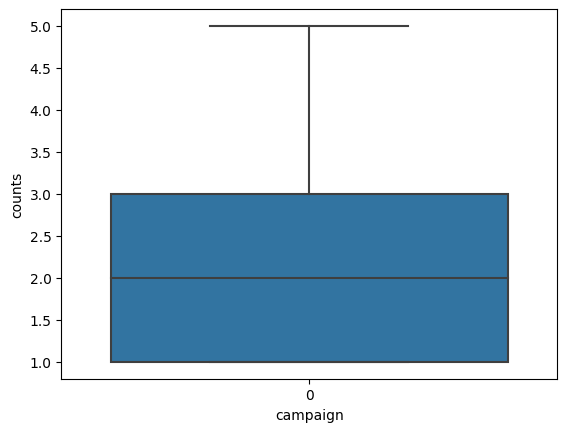

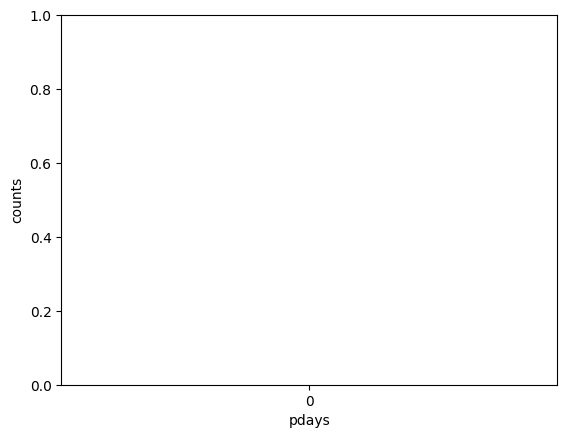

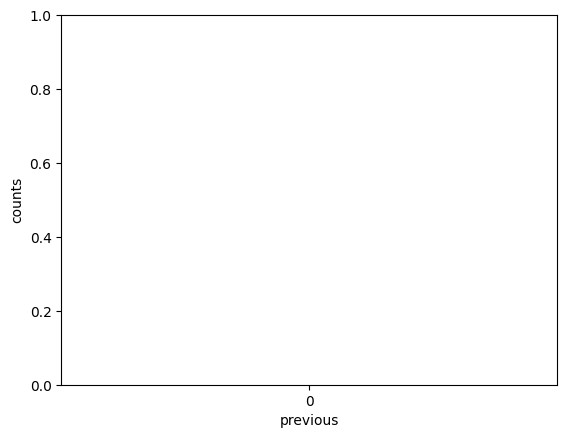

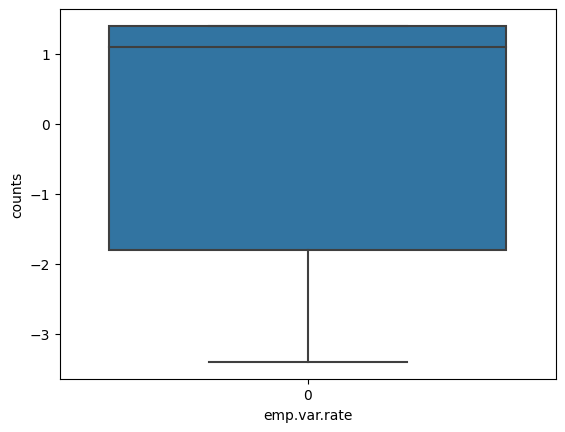

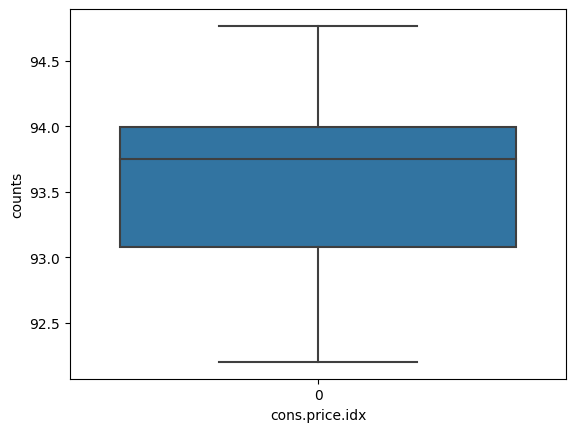

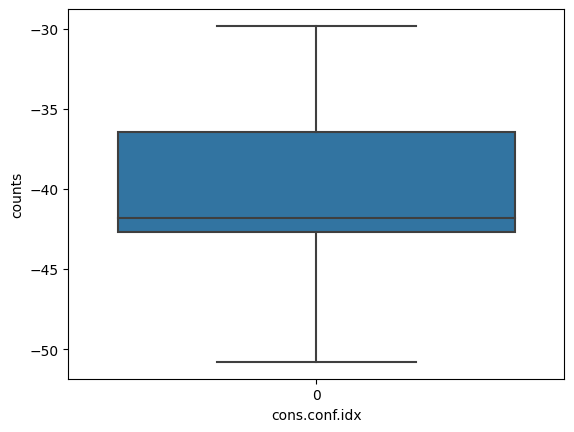

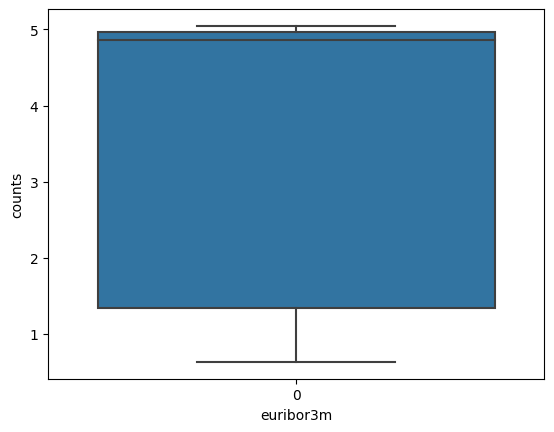

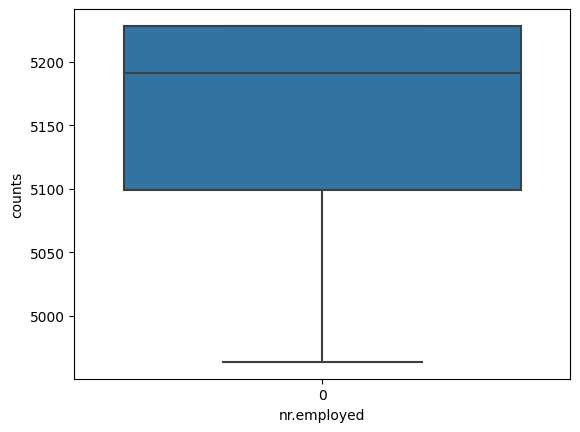

In [52]:
for a in col:
    if data[a].dtype == 'float64':
        sns.boxplot(data[a])
        plt.xlabel(a)
        plt.ylabel('counts')
        plt.show()

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40719 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        38233 non-null  float64
 11  campaign        37811 non-null  float64
 12  pdays           0 non-null      float64
 13  previous        0 non-null      float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   40749 non-null 

In [55]:
data.shape

(41199, 21)

In [56]:
col

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [57]:
col.remove('y')

In [58]:
col

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [59]:
for a in col:
    if data[a].dtypes =='object':
        data[a] = data[a].fillna(data[a].mode()[0])       # [0] <-- Indexing
    else:
        data[a]=data[a].fillna(data[a].mean())

In [60]:
data.isna().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             41199
previous          41199
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [61]:
data = data.drop(['previous','pdays'], axis=1)

In [62]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [63]:
# 95% --> Object type data
# can i perform any operation on my object type data?
# label encoder --> convert object to numeric 
# gender --> m m m m  f f  m f m f cat3 cat4
# m=0
# f=1
# gender --> 0 0 0 0 1 1 0 1 0 1 2 3 

# i will apply label encoder to my entire dataset
# that includes my age column

#  my age column has lot of unique values now how many label encodings will have?
#   thats why i am performing binning
# 10-20
# 20-30
# 30-40
# 40-50  and so on



In [64]:
##Binning of Age##
# eg-  10  15  25  5  60
# 1-10  --> 10,5
# 11-20 --> 15
# 21-30 --> 25
# 51-60 --> 60




bins = [0, 1, 5, 10, 25, 50, 100]
data['age'] = pd.cut(data['age'], bins)
data['age'] = data.age.astype(str)

In [65]:
data['age'].unique()

array(['(50, 100]', '(25, 50]', '(10, 25]'], dtype=object)

In [66]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(25, 50]",services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(25, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [68]:
col_list =[]
for a in list(data.columns):
    if ((data[a].dtype == 'object') & (a !='y')):
        col_list.append(a)

In [69]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [70]:
from sklearn.preprocessing import LabelEncoder      # label encoder is used for convert the object type data to numeric
labelencoder = LabelEncoder()

for i in col_list:
    data[i]=labelencoder.fit_transform(data[i])      # to transform the data

In [71]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,261.0,1.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,2,7,1,3,1,0,0,1,6,1,149.0,1.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,226.0,1.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,151.0,1.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,2,7,1,3,0,0,2,1,6,1,307.0,1.0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [72]:
data['marital'].value_counts()

marital
1    24939
2    11568
0     4612
3       80
Name: count, dtype: int64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41199 non-null  int32  
 1   job             41199 non-null  int32  
 2   marital         41199 non-null  int32  
 3   education       41199 non-null  int32  
 4   default         41199 non-null  int32  
 5   housing         41199 non-null  int32  
 6   loan            41199 non-null  int32  
 7   contact         41199 non-null  int32  
 8   month           41199 non-null  int32  
 9   day_of_week     41199 non-null  int32  
 10  duration        41199 non-null  float64
 11  campaign        41199 non-null  float64
 12  poutcome        41199 non-null  int32  
 13  emp.var.rate    41199 non-null  float64
 14  cons.price.idx  41199 non-null  float64
 15  cons.conf.idx   41199 non-null  float64
 16  euribor3m       41199 non-null  float64
 17  nr.employed     41199 non-null 

# VIF

VIF stands for **Variance Inflation Factor**. It is a measure of the degree of multicollinearity (correlation between predictor variables) in a multiple regression analysis. VIF measures how much the variance of the estimated regression coefficients are increased due to multicollinearity.

In multiple regression, VIF is calculated for each predictor variable by regressing that variable on all other predictor variables in the model. The resulting R-squared value is then used to calculate the VIF as:

VIF = 1 / (1 - R-squared)

The VIF value ranges from 1 upwards, with a VIF of 1 indicating no multicollinearity and higher values indicating increasing levels of multicollinearity. Generally, a VIF value of 1-2 is considered acceptable, while a value above 5-10 indicates significant multicollinearity.

VIF is an important diagnostic tool for identifying multicollinearity in a regression model. High levels of multicollinearity can make it difficult to interpret the individual effects of predictor variables on the outcome variable and can lead to unstable and unreliable regression coefficient estimates. In such cases, it may be necessary to consider removing some of the predictor variables from the model or transforming the variables to reduce the level of multicollinearity.

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for a in data.columns:
    if((data[a].dtype != 'object') & (a != 'y')):
        col_list.append(a)

x= data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['vif'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data    

,feature,vif
0,age,8.481031
1,job,2.118785
2,marital,5.188508
3,education,4.439721
4,default,1.388296
5,housing,2.206091
6,loan,1.207884
7,contact,2.724239
8,month,6.832485
9,day_of_week,3.090802


VIF value should be less than 6

In [75]:
data = data.drop(['nr.employed'], axis=1)

In [76]:
col_list = []
for a in data.columns:
    if((data[a].dtype != 'object') & (a != 'y')):
        col_list.append(a)

x= data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['vif'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data  

,feature,vif
0,age,8.481016
1,job,2.118173
2,marital,5.188324
3,education,4.439013
4,default,1.385717
5,housing,2.205560
6,loan,1.207819
7,contact,2.376240
8,month,5.718480
9,day_of_week,3.090291


In [77]:
data = data.drop(['cons.price.idx'], axis=1)

In [78]:
col_list = []
for a in data.columns:
    if((data[a].dtype != 'object') & (a != 'y')):
        col_list.append(a)

x= data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['vif'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data  

,feature,vif
0,age,8.131587
1,job,2.104159
2,marital,5.060455
3,education,4.341878
4,default,1.384411
5,housing,2.200083
6,loan,1.207291
7,contact,2.249602
8,month,5.637275
9,day_of_week,3.059816


In [79]:
data = data.drop(['euribor3m'], axis=1)

In [80]:
col_list = []
for a in data.columns:
    if((data[a].dtype != 'object') & (a != 'y')):
        col_list.append(a)

x= data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['vif'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,vif
0,age,7.631226
1,job,2.094740
2,marital,4.983567
3,education,4.204793
4,default,1.383725
5,housing,2.191605
6,loan,1.206918
7,contact,2.233841
8,month,5.260015
9,day_of_week,3.018188


In [81]:
data = data.drop(['cons.conf.idx'], axis=1)

In [82]:
col_list = []
for a in data.columns:
    if((data[a].dtype != 'object') & (a != 'y')):
        col_list.append(a)

x= data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['vif'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,vif
0,age,6.236352
1,job,2.075601
2,marital,4.314568
3,education,4.049724
4,default,1.371389
5,housing,2.135781
6,loan,1.202151
7,contact,2.219700
8,month,4.758455
9,day_of_week,2.915604


In [83]:
data = data.drop('poutcome', axis=1)

In [84]:
col_list = []
for a in data.columns:
    if((data[a].dtype != 'object') & (a != 'y')):
        col_list.append(a)

x= data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['vif'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,vif
0,age,5.787205
1,job,2.066029
2,marital,4.119874
3,education,3.960114
4,default,1.370393
5,housing,2.122190
6,loan,1.201209
7,contact,2.202360
8,month,4.726989
9,day_of_week,2.873615


In [ ]:
# data.to_csv('enter the path to save the file')
# export csv file to the system

In [85]:
vif_data.feature

0              age
1              job
2          marital
3        education
4          default
5          housing
6             loan
7          contact
8            month
9      day_of_week
10        duration
11        campaign
12    emp.var.rate
Name: feature, dtype: object

In [86]:
ind_feature = list(vif_data.feature)        # independent feature
ind_feature

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'emp.var.rate']

In [87]:
df_ind = data[ind_feature]
df_ind

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
0,2,3,1,0,0,0,0,1,6,1,261.000000,1.000000,1.100000
1,2,7,1,3,1,0,0,1,6,1,149.000000,1.000000,1.100000
2,1,7,1,3,0,2,0,1,6,1,226.000000,1.000000,1.100000
3,1,0,1,1,0,0,0,1,6,1,151.000000,1.000000,1.100000
4,2,7,1,3,0,0,2,1,6,1,307.000000,1.000000,1.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,1,5,1,5,0,2,0,0,7,0,239.000000,3.000000,-1.100000
41195,1,0,1,5,0,2,0,0,7,0,239.000000,3.000000,-1.100000
41196,1,5,1,6,0,2,0,0,7,0,239.000000,3.000000,-1.100000
41197,1,0,1,6,0,2,0,0,6,2,203.262313,1.941975,0.081656


In [88]:
df_dep = data['y']
df_dep

0        0
1        0
2        0
3        0
4        0
        ..
41194    0
41195    0
41196    0
41197    0
41198    0
Name: y, Length: 41199, dtype: object

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_ind,df_dep,test_size=0.25, random_state=0)

In [90]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
16758,1,7,0,3,0,0,2,0,3,2,187.0,1.000000,1.4
8263,1,0,2,3,0,0,2,1,4,3,25.0,1.000000,1.4
22970,1,0,1,6,0,2,2,0,1,1,153.0,3.000000,1.4
21373,1,9,1,3,0,0,0,0,1,1,298.0,1.941975,1.4
22310,1,9,1,5,1,0,0,0,1,2,68.0,1.000000,1.4


In [91]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()

In [92]:
#   Model fitting /  Training

LogisticRegression.fit(x_train, y_train)

LogisticRegression()

In [93]:
test_pred = LogisticRegression.predict(x_test)

In [94]:
test_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [95]:
pd.DataFrame(LogisticRegression.predict_proba(x_test))

#     here predict_proba predict the probabilty 
#     here 0 <--person dont buy insurance
#          1 <-- person buy the insurance

,0,1
0,0.987728,0.012272
1,0.622573,0.377427
2,0.638759,0.361241
3,0.976960,0.023040
4,0.982566,0.017434
...,...,...
10295,0.894605,0.105395
10296,0.970327,0.029673
10297,0.978368,0.021632
10298,0.929907,0.070093


In [96]:
from sklearn.metrics import *


In [97]:
c1= confusion_matrix(y_test,test_pred)
c1

array([[8974,  138],
       [1057,  131]], dtype=int64)

In [98]:
accuracy_score(y_test,test_pred)

0.8839805825242718

In [99]:
#Sensitivity  =  TP / (TP+FN)
#Specificity  =  TN / (TN+FP)

In [100]:
sen=c1[0,0]/(c1[0,0]+c1[0,1])
sen

# how much % the model predected correct data
# 99% the model has predicted correctly
# 1--1
# 0--0

0.9848551360842844

In [101]:
sep=c1[1,1]/(c1[1,1]+c1[1,0])
sep

# how much % the model has predicted the data in a wrong manner
# 15% the model did not predict correctly
#  0--1
#  1--0

0.11026936026936027

In [102]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      9112
           1       0.49      0.11      0.18      1188

    accuracy                           0.88     10300
   macro avg       0.69      0.55      0.56     10300
weighted avg       0.85      0.88      0.85     10300

